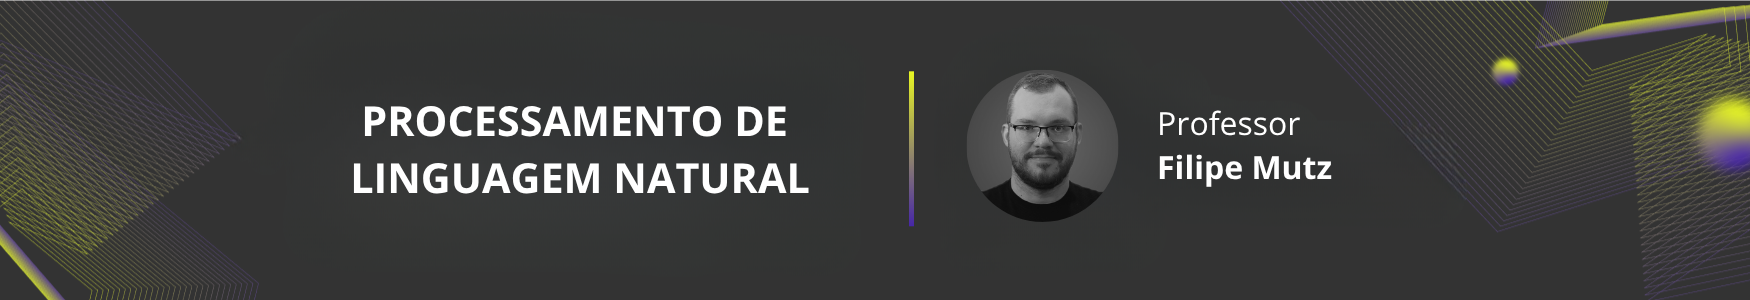

# 📝🤖 Word Embeddings


## Motivação

Os próximos métodos de PLN que vamos estudar são métodos de aprendizado baseado em sequências (*sequence learning*). Diferente do BoW, eles são capazes de processar o texto como uma **sequência de unidades textuais** (caracteres, palavras ou subpalavras), isto é, como um termos em uma determinada **ordem**. 

Surge a questão de como utilizar o texto como entrada para estes métodos?

Na primeira semana, estudamos o processo de **tokenização** que é capaz de dividir textos em partes menores e atribuir um índice inteiro à cada unidade textual. Um caminho possível, portanto, seria tokenizar o texto e utilizar sequência de números inteiros como entrada para os modelos. 

Os **Word embeddings** dão um passo além e transformam palavras em **vetores numéricos** de tamanho fixo. Estes vetores são construídos de forma que palavras/tokens com significado parecido sejam mapeados em vetores próximos no espaço, mesmo se escritos de forma completamente diferente. 

Assim, dado um texto, os tokens são extraídos, transformados em *word embeddings* e a sequência de vetores é usada como entrada para os algoritmos de aprendizado de sequências.


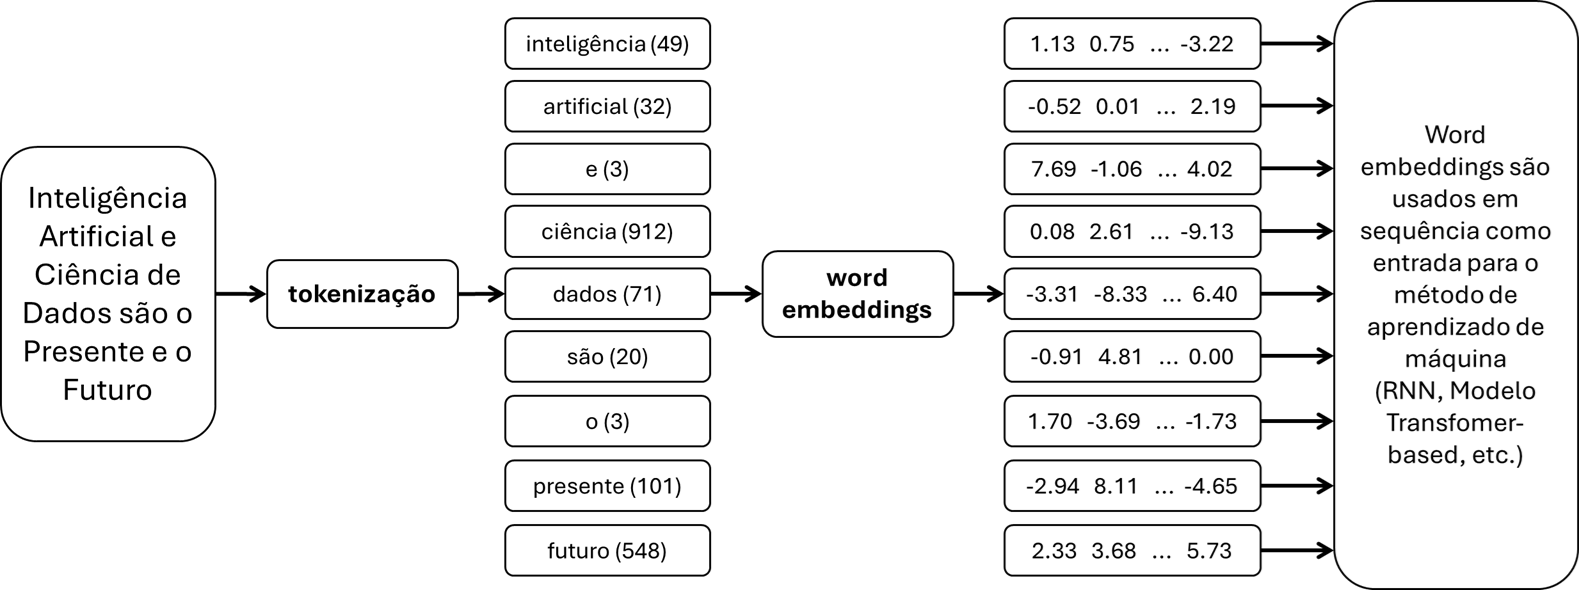

## Agenda

- Definições Básicas 
- Classificação de Métodos para Construção de *Word Embeddings*
- Como produzir *word embeddings* usando *Continuous Bag-of-Words (CBoW)*.
- Uso de *word embeddings* pré-treinados.
- Análise qualitativa dos *word embeddings*.

## Definições Básicas



**Word Embeddings**: São representações vetores das palavras ou tokens. São construídos com base em seu uso e na relação com outras palavras e tokens em grandes conjuntos de documentos. 


**Sentence Embeddings** (cena dos próximos capítulos): São representações vetoriais de trechos de texto como frases ou parágrafos.

**Janela de Contexto**: É um intervalo de palavras ao redor de uma palavra de referência.

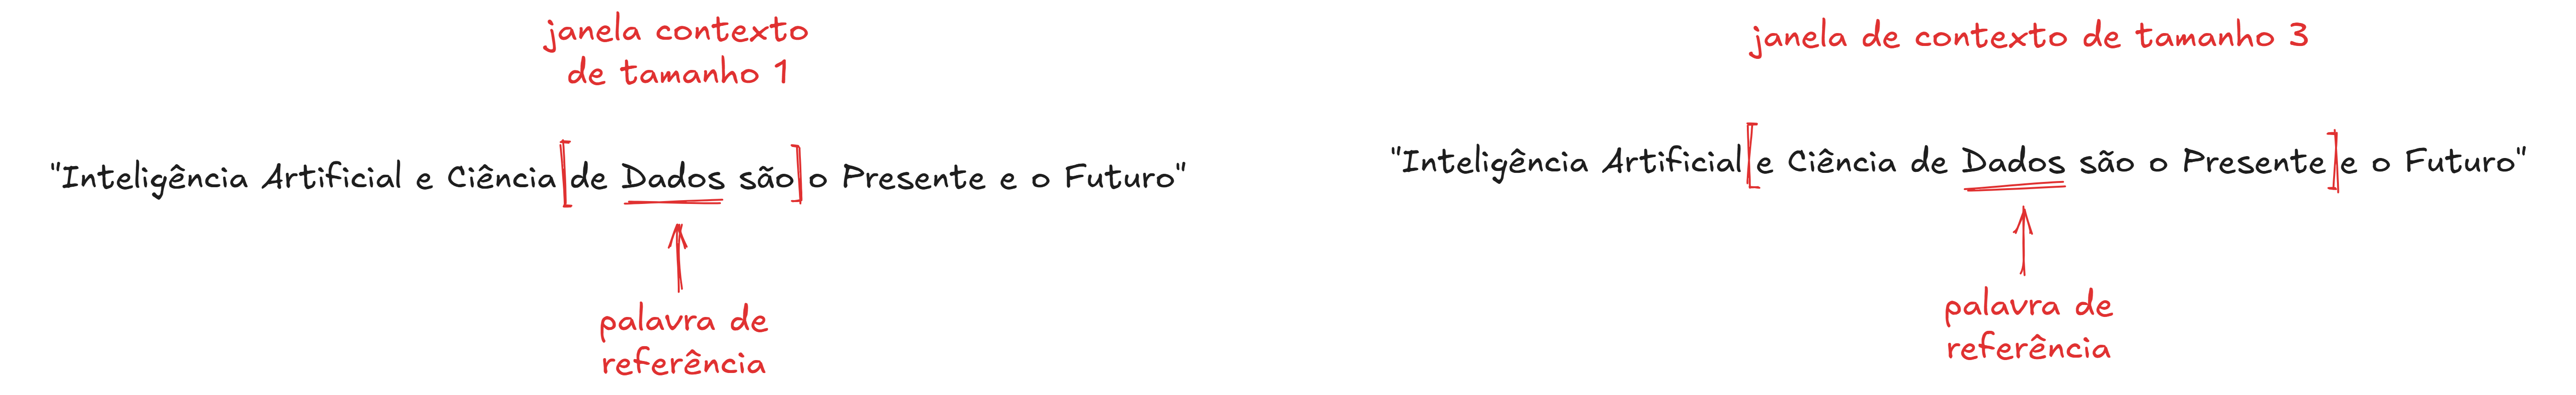

**Dicionário ou Vocabulário**: Conjunto de palavras diferentes existentes nos documentos.

**Tarefa de Construção de *Word Embeddings***: Dado um corpus de documentos textuais $\mathcal{T}$ contendo um conjunto de palavras diferentes $\mathcal{D}$ e um tamanho de embedding $k$, encontrar uma função $f : \mathcal{D} \rightarrow \mathbb{R}^k$ que considere o padrão de uso das palavras em $\mathcal{T}$.


## Classificação de Métodos para Construção de *Word Embeddings*


Existem diversos métodos para construção de *word embeddings*. Os métodos recentes são baseados em técnicas de **aprendizado**. Os *word embeddings* são inicializados com valores aleatórios e ajustados iterativamente (usando descida de gradiente, por exemplo) para otimizar uma dada função objetivo. Diferentes métodos utilizam diferentes funções objetivo.

Os métodos para construção de *word embeddings* tipicamente partem da hipótese que **palavras possuem significados parecidos se aparecem em  contextos semelhantes, isto é, com as mesmas palavras ao redor**. 

**Exemplo:** Nomes de times de futebol possuem similaridade semântica por serem adequados para preencher as lacunas nas frases abaixo. 

- *"A camisa de futebol mais bonita do mundo é a do ________."*
- *"O time do ________ venceu o time do ________ na partida de sábado."*
- *"O título do campeonato foi conquistado pelo ________."*

**Modelos baseados em Predição (e.g., Word2Vec)** 

* **Continuous Bag-of-Words (CBoW)**: Aprendem os *embeddings* tentando prever a palavra de referência a partir de seu contexto.

* **Skip-gram**: Faz o inverso e aprende os *embeddings* tentando prever as palavras do contexto usando a palavra de referência.


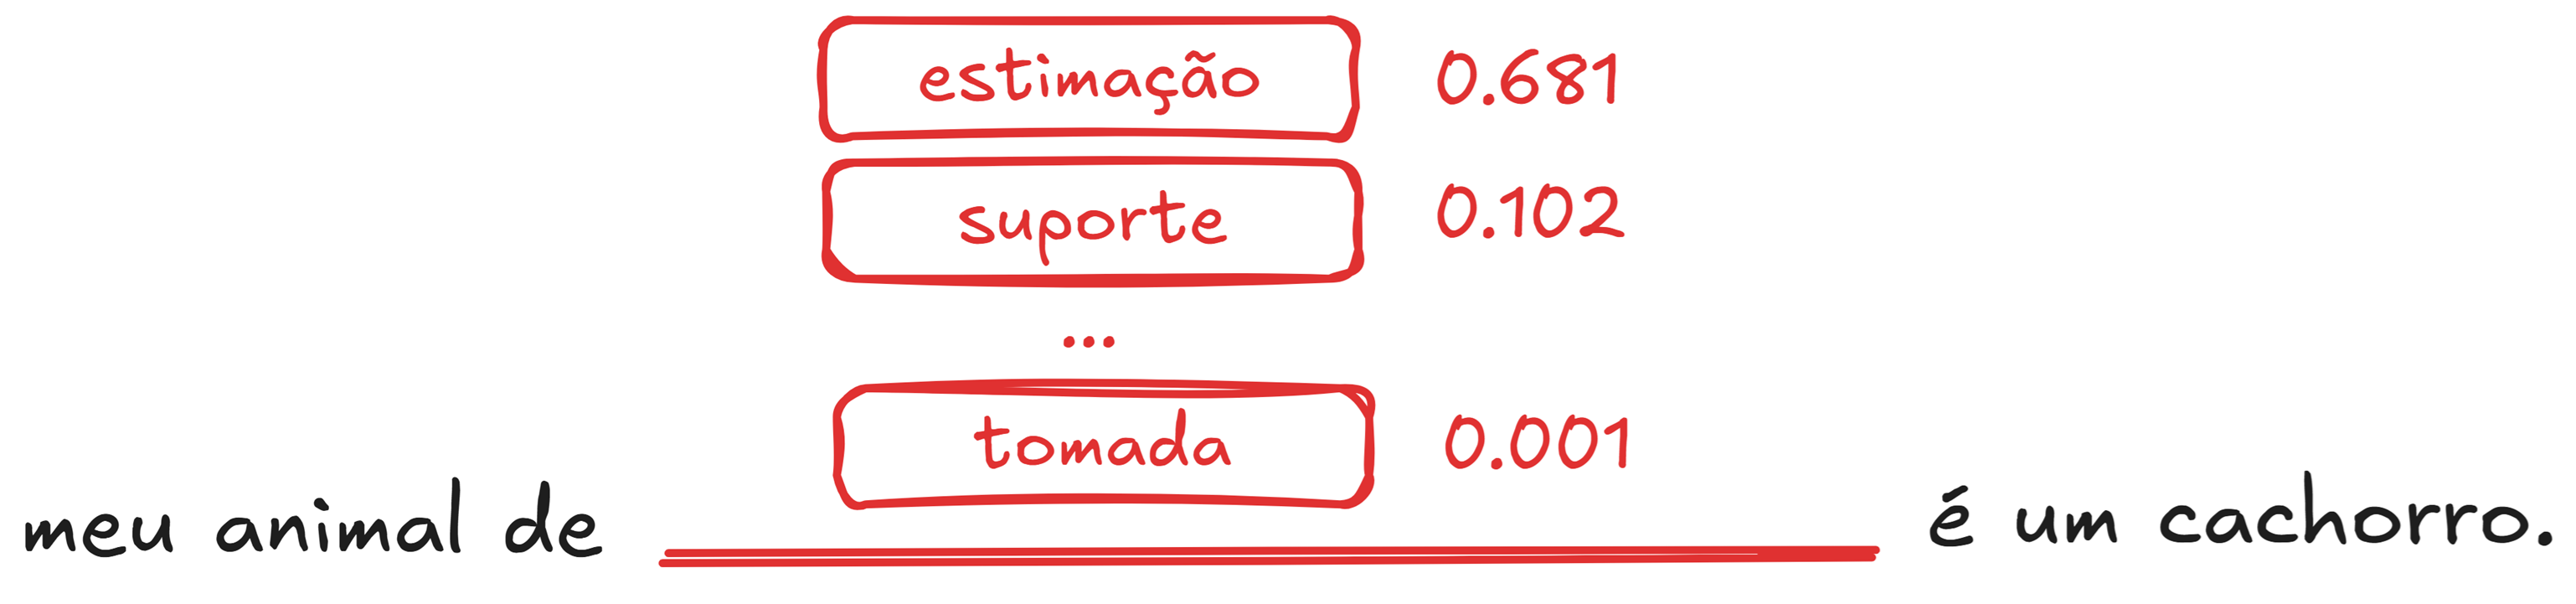

**Modelos baseados em Estatísticas (e.g., GloVe)**: Utilizam estatísticas globais do corpus, como a frequência de coocorrência de palavras e tokens em janelas de contexto para aprender os *embeddings*.

**Modelos "Task-Specific"**: Em algumas arquiteturas recentes, *embeddings* são aprendidos juntamente com os demais parâmetros do modelo durante o treinamento, sem a necessidade de uma etapa separada *a priori*. Estes *embeddings* são **otimizados para maximizar a performance na tarefa em questão**.

**Modelos baseados em Linguagem Contextualizada**: Diferentemente dos modelos anteriores, que atribuem um único vetor a cada palavra, os modelos modernos — como **BERT**, **GPT** e outros LLMs (*Large Language Models*) — produzem *embeddings* que variam conforme o contexto em que a palavra aparece. Por exemplo, a palavra "mangas" terá vetores diferentes em "comi duas mangas" e "arregacei as mangas e comecei a trabalhar".



## Continuous Bag-of-Words (CBoW)

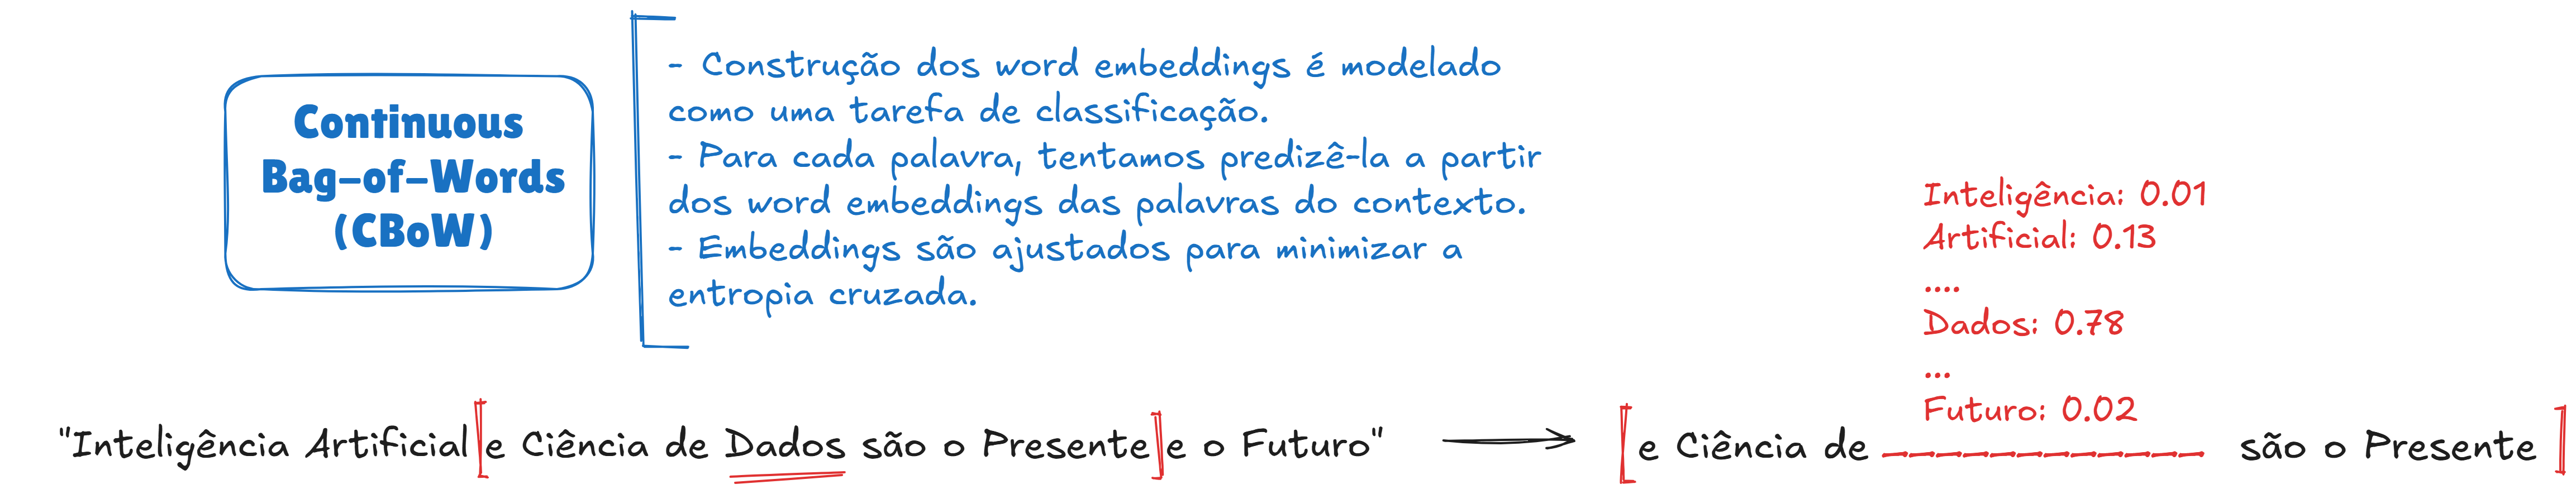

No algoritmo *Continuous Bag-of-Words* (CBoW), o problema de construção dos *word embeddings* é modelado como uma **tarefa de classificação**. 

- Dada uma palavra de referência, **escondemos a palavra tentamos predizê-la a partir dos *word embeddings* das palavras do contexto**. 
- *Embeddings* são ajustados para minimizar o erro de predição. 
- O processo é repetido para palavras escolhidas aleatoriamente no corpus. 

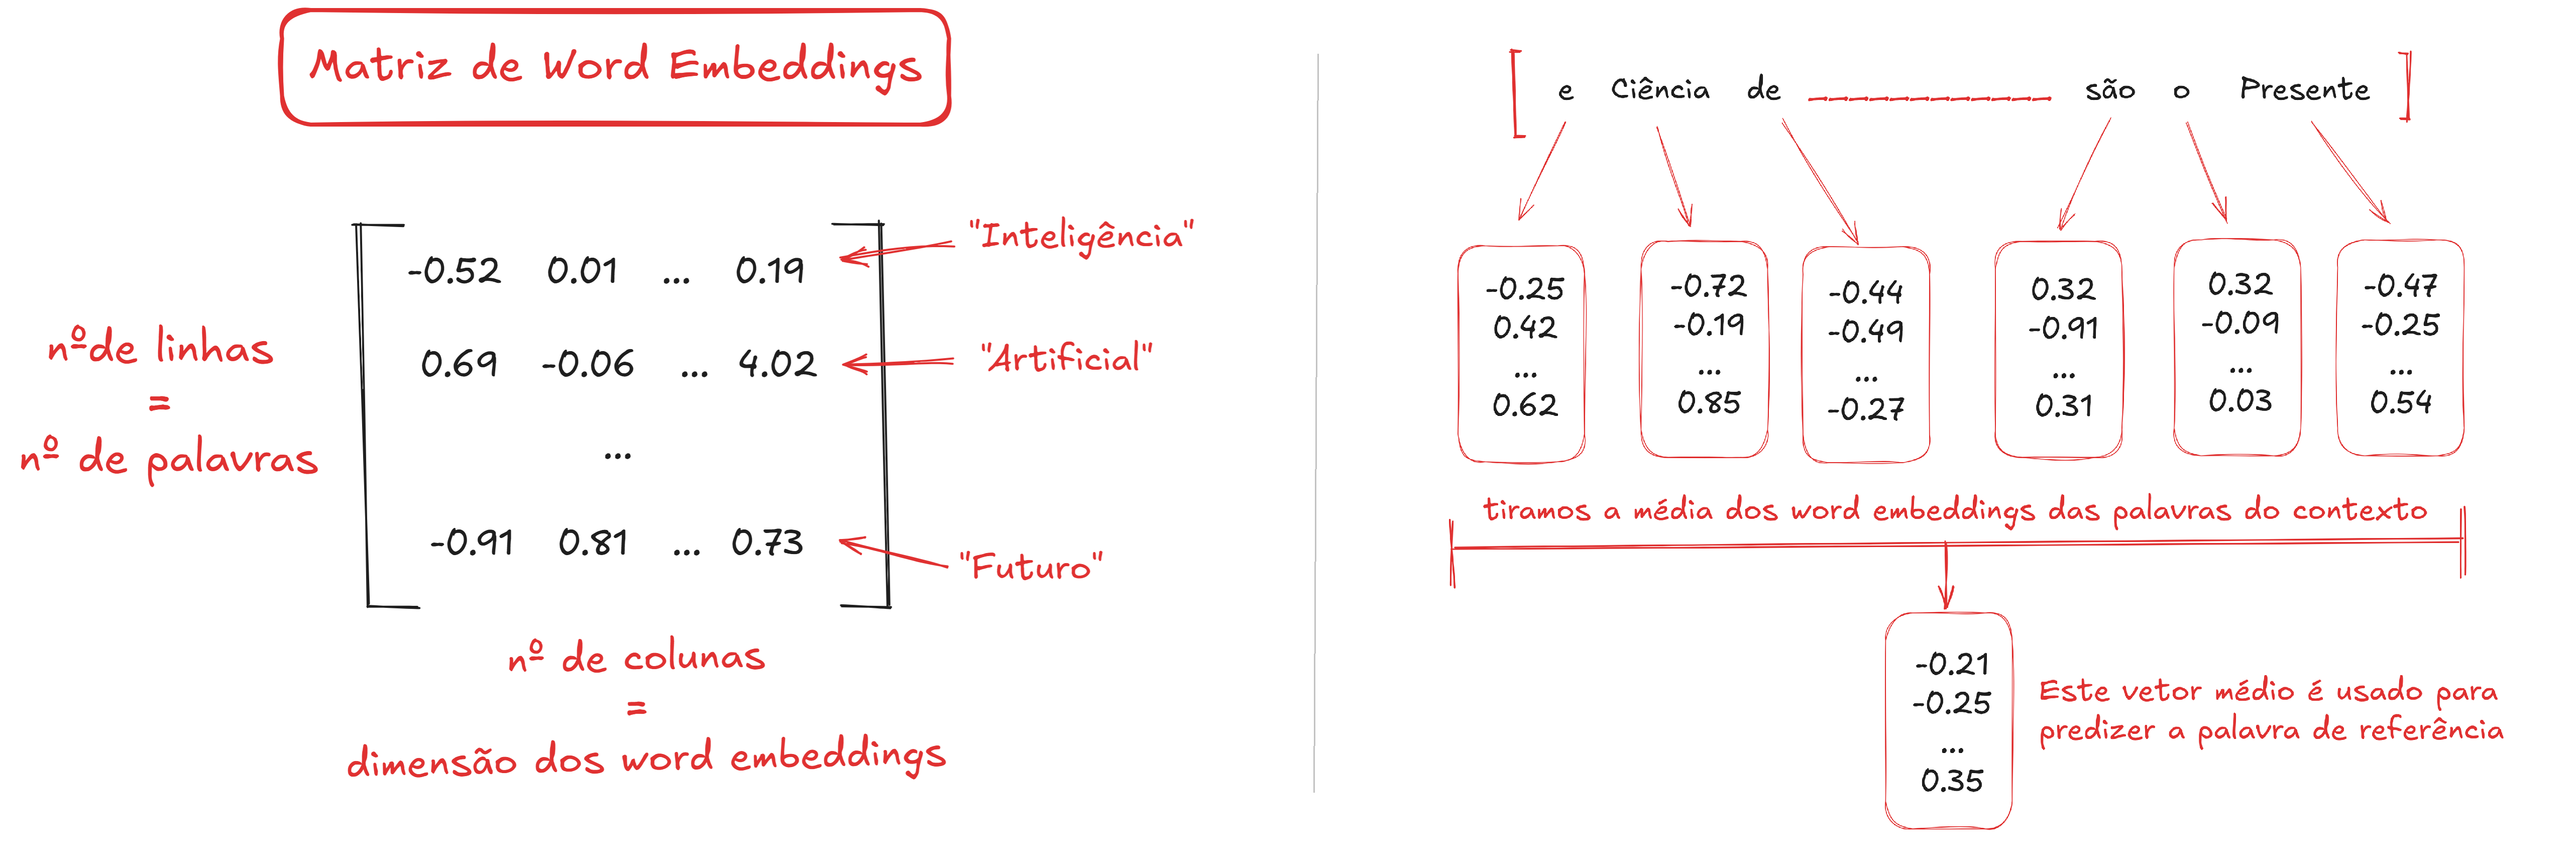

**Representação dos *Word Embeddings*:** Os *word embeddings* são armazenados em uma matriz $W_{n \times k}$, onde $n$ é o número de palavras de $\mathcal{D}$ e $k$ é a dimensionalidade dos *embeddings*. A matriz é inicializada com valores aleatórios. Cada **linha** da matriz é o *word embedding* de uma palavra. 

**Predição da Palavra de Referência:** Dada uma palavra de referência e sua janela de contexto, extraímos os *word embeddings* das palavras do contexto de $W$, $w_1, \cdots, w_p$. Calculamos a **média dos *embeddings*** e este vetor é usado para predizer a palavra de referência. As probabilidades por palavra $y$ são obtidas multiplicando o vetor médio por uma matriz $W'$ (também inicialmente aleatória), seguido de uma função softmax. 

$$
y = \text{softmax} \left(W' \  \frac{1}{p} \sum_{i=1}^p w_i \right)
$$

As matrizes $W$ e $W'$ são ajustadas para maximizar a probabilidade da palavra de referência. Para isto, utilizamos como função de perda a entropia cruzada. 

**Nota**: A dimensionalidade dos *word embeddings* e o tamanho da janela de contexto são hiperparâmetros do algoritmo.

O processo é repetido por um número de épocas usando palavras escolhidas aleatoriamente no corpus. Os word embeddings resultantes são as linhas da matriz $W$ ao final do processo.

**Visão Geral do Processo:** A figura traz uma síntese do processo fim a fim.

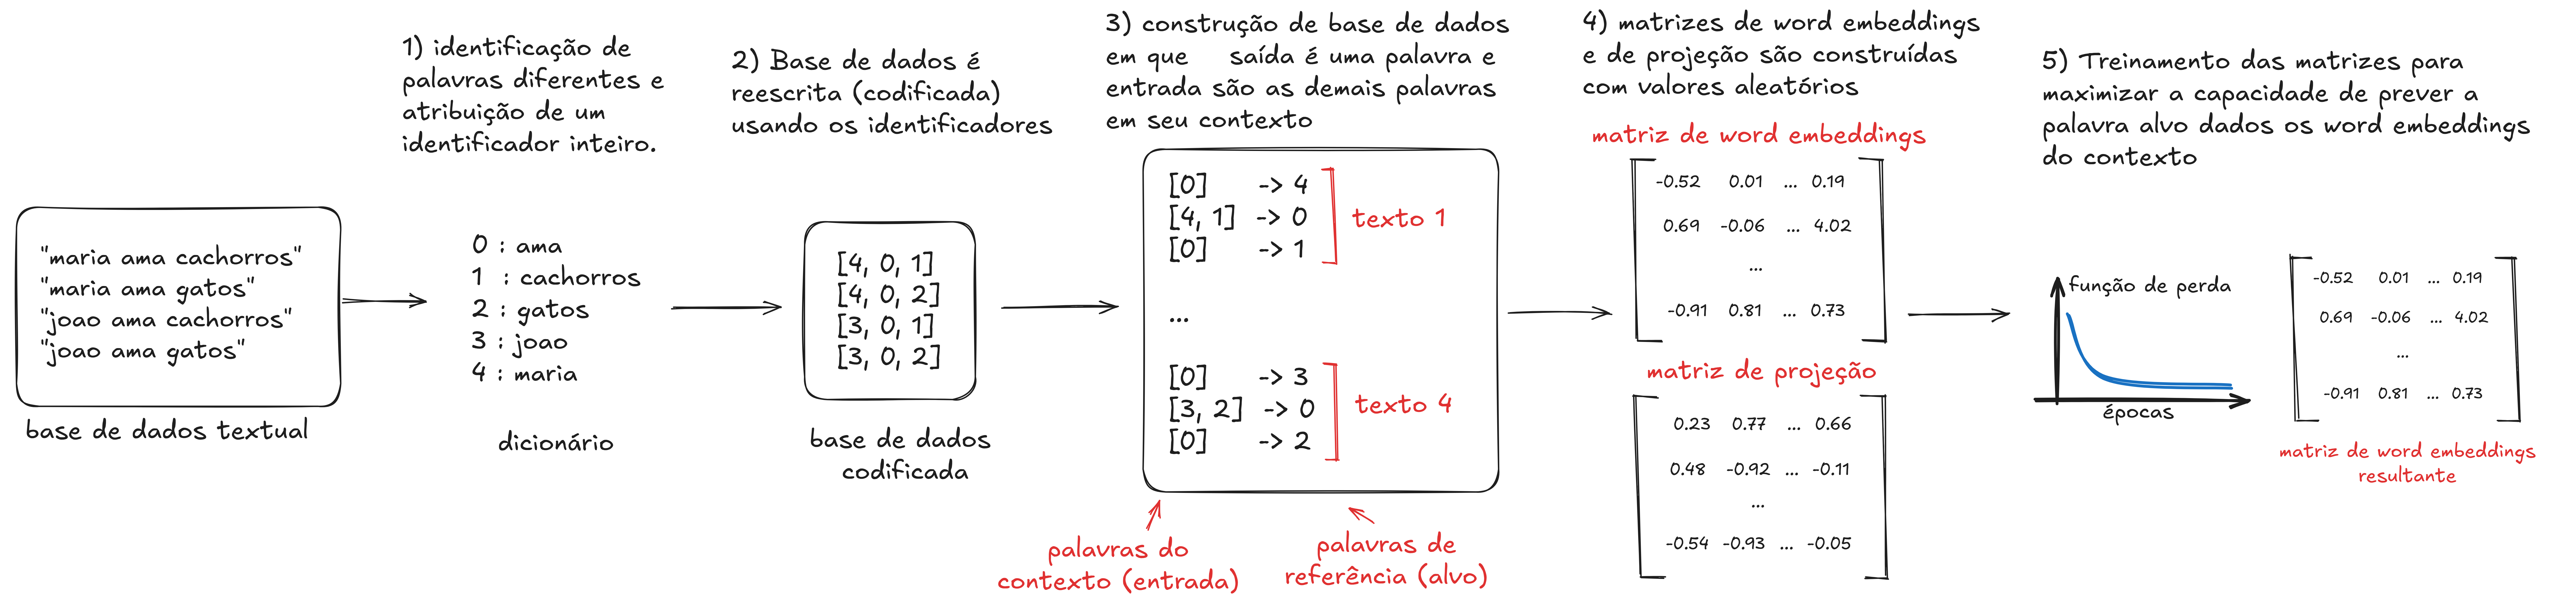

## Implementação do CBoW usando Pytorch

Considere o seguinte corpus textual:

In [98]:

corpus = [
    "maria ama cachorros",
    "maria ama gatos",
    "joao ama cachorros",
    "joao ama gatos",
]


Vamos identificar as palavras únicas e atribuir um número inteiro para cada uma delas:

In [99]:

# une os textos em uma grande string e separa as palavras
tokens = "\n".join(corpus).split()

# seleciona as palavras únicas
vocab = sorted(set(tokens))

# atribui um número inteiro para cada palavra
word2idx = {w: i for i, w in enumerate(vocab)}
word2idx

{'ama': 0, 'cachorros': 1, 'gatos': 2, 'joao': 3, 'maria': 4}

Por conveniência, vamos criar um dicionário para fazer o transformação inversa e mapear os índices em suas palavras:

In [100]:

idx2word = {i: w for w, i in word2idx.items()}
idx2word


{0: 'ama', 1: 'cachorros', 2: 'gatos', 3: 'joao', 4: 'maria'}

A seguir, reescrevemos o corpus substituindo as palavras por seus identificadores:

In [101]:

def encode(text):
    # quebramos os textos em suas palavras e
    # usamos word2idx para mapear as palavras em índices.
    return [word2idx[w] for w in text.split()]

encoded_texts = [encode(text) for text in corpus]
encoded_texts

[[4, 0, 1], [4, 0, 2], [3, 0, 1], [3, 0, 2]]

A seguir, vamos construir a base de dados para treinar o CBoW.

In [102]:

def generate_cbow_dataset(encoded_texts, window):
    ds = []

    # para cada texto
    for text in encoded_texts:

        # para cada palavra
        for i in range(len(text)):

            # selecionamos os termos da janela de contexto
            # excluindo a palavra de referência
            context = text[max(0, i-window) : i] + text[(i+1) : (i+1+window)]

            # a palavra de referência é o alvo da predição
            target = text[i]

            # cada amostra é um par (entrada, saída), em que a entrada
            # é a janela de contexto e a saída é a palavra de referência
            ds.append([context, target])

    return ds

ds = generate_cbow_dataset(encoded_texts, window=2)
ds

[[[0, 1], 4],
 [[4, 1], 0],
 [[4, 0], 1],
 [[0, 2], 4],
 [[4, 2], 0],
 [[4, 0], 2],
 [[0, 1], 3],
 [[3, 1], 0],
 [[3, 0], 1],
 [[0, 2], 3],
 [[3, 2], 0],
 [[3, 0], 2]]

Inicializamos as matrizes de *word embeddings* e a matriz para prever a palavra de referência.

In [130]:
import torch

# numero de palavras diferentes no vocabulario
vocab_size = len(vocab)

# dimensionalidade dos word embeddings
dim = 2

# matriz de word embeddings
w_embed = torch.nn.Parameter(torch.randn(vocab_size, dim) * 0.1)

# matriz para prever palavra de referência
w_out = torch.nn.Parameter(torch.randn(vocab_size, dim) * 0.1)


Podemos acessar um word embedding usando a síntaxe abaixo.

In [104]:

idx = word2idx['cachorros']
w_embed[idx]


tensor([ 0.0863, -0.1888], grad_fn=<SelectBackward0>)

Contudo, o pytorch também permite recuperar vários *word embeddings* usando uma lista de índices:

In [105]:

# word embeddings das palavras 1 ("cachorros") e 2 ("gatos")
w_embed[[1, 2]]

tensor([[ 0.0863, -0.1888],
        [-0.0971,  0.1419]], grad_fn=<IndexBackward0>)

Definimos a função de perda e o otimizador para ajustar as matrizes.

In [131]:

# funcao de perda
loss_fn = torch.nn.CrossEntropyLoss()

# otimizador utilizado para ajustar matrizes
opt = torch.optim.Adam([w_embed, w_out], lr=0.01)


A célula a seguir traz o loop principal do algoritmo. 

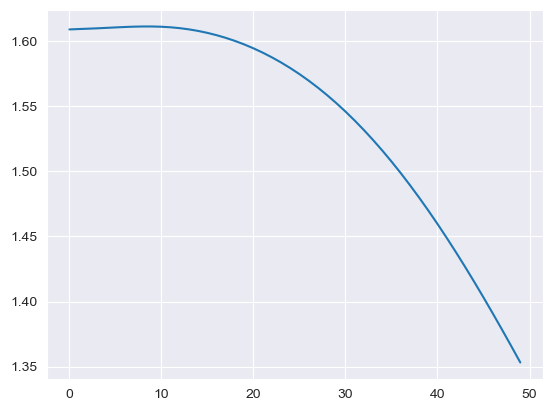

In [132]:

# número de épocas de treinamento
n_epochs = 50

# lista para armazenar a evolução do valor
# da função de perda ao longo do treinamento
history = []

# repete por um número de épocas
for epoch in range(n_epochs):
    total_loss = 0

    # reinicia os gradientes das matrizes a cada época
    opt.zero_grad()

    # para cada amostra do dataset contendo uma janela
    # de contexto e uma palavra de referência
    for ctx, tgt in ds:

        # selecionamos os word embeddings das palavras
        # da janela de contexto
        v = w_embed[ctx]

        # calcula a média dos word embeddings
        v = v.mean(dim=0)

        # w_out x v
        logits = torch.matmul(w_out, v)

        # calcula a entropia cruzada (softmax calculada internamente)
        loss = loss_fn(logits, torch.tensor(tgt))

        # computa o gradiente da função de perda
        # em relação às matrizes
        loss.backward()

    # atualiza as matrizes
    opt.step()

    # computa estatísticas e mostra informações na saída
    # de tempos em tempos
    total_loss += loss.item()
    history.append(total_loss)

    #if epoch % max(1, n_epochs // 20) == 0:
    #    print(f"CBOW epoch {epoch} loss {total_loss:.4f}")


# plota a evolução da função de perda
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.plot(history)

Para avaliar a qualidade dos *word embbedings* aprendidos, vamos visualizar os pontos no espaço e a similaridade entre eles usando o cosseno dos vetores.

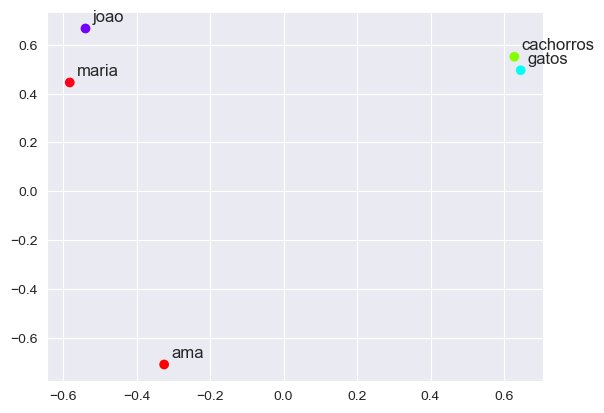

In [148]:

embeds = w_embed.detach().numpy()

x = embeds[:, 0]
y = embeds[:, 1]
labels = vocab

plt.scatter(x, y, c=range(len(x)), cmap='hsv')

for xi, yi, txt in zip(x, y, labels):
    plt.annotate(txt, (xi, yi), textcoords="offset points",
                xytext=(5, 5), ha='left', fontsize=12)

In [134]:
import numpy as np
import pandas as pd

embeds = w_embed.data.detach().numpy()

# calcula as normas dos vetores
norms = np.linalg.norm(embeds, axis=1, keepdims=True)

# calcula o cosseno (x1 . x2) / (|x1| |x2|)
cos_sim = (embeds @ embeds.T) / (norms * norms.T)

# mostra como uma tabela
pd.DataFrame(cos_sim, index=vocab, columns=vocab).style.format('{:.2f}').set_properties(**{'text-align': 'center'})

## *Word embeddings* pré-treinados



Existem diversos outros métodos para criação de *word embedding* como *skip-gram*, GloVe e FastText [ALM19, WAN20]. 

A biblioteca `gensim` provê implementações de diversos métodos para construção de *word embeddings*, quanto modelos de *word embeddings* pré-treinados usando bases de dados de larga escala. Quanto maior a base de dados utilizada no treinamento, mais padrões de uso dos termos serão aprendidas pelos *word embeddings*.


Use o comando abaixo para instalar a biblioteca `gensim`.

In [ ]:
!python -m pip install gensim

Os modelos existentes na biblioteca podem ser vistos [neste link](https://github.com/piskvorky/gensim-data?tab=readme-ov-file#models) ou usando o comando abaixo em um script python. Os números ao final dos nomes indicam a dimensionalidade dos *word embeddings*. 

In [ ]:
import gensim.downloader

list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

No curso, vamos utilizar o modelo `glove-twitter-50` por apresentar um bom *trade-off* entre custo computacional e qualidade dos *embeddings*. As células abaixo fazem o download do modelo e mostram como obter o *word embedding* de um termo e como buscar os termos mais similares a outros.

In [3]:
glove_vectors = gensim.downloader.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [10]:
embedding = glove_vectors['computador']
embedding

array([ 5.0599e-01, -2.9387e-01, -5.9358e-01, -2.6763e-01, -3.7652e-01,
       -5.0599e-02, -2.3308e-01, -1.0927e+00,  6.4846e-01, -5.9309e-01,
        2.4672e-01, -3.3852e-01, -3.2041e-01,  6.7158e-02, -8.8692e-01,
       -6.7118e-01, -3.1050e-01, -2.5613e-01,  4.7955e-04, -1.0491e+00,
       -6.2485e-01,  4.2897e-01,  2.6246e-01, -2.8833e-01, -6.4030e-01,
       -1.9526e+00, -7.5087e-02, -4.3035e-02,  4.7154e-01,  1.4329e+00,
       -2.2267e-01, -9.5768e-01, -1.1655e-01, -1.5614e+00, -1.2723e+00,
       -1.2228e-01,  3.6655e-01, -1.1384e+00, -1.8805e+00,  4.8224e-02,
       -9.6045e-01,  1.2337e+00, -8.9174e-01, -1.3951e+00,  1.7954e-01,
        9.1536e-02, -4.2366e-01,  8.2208e-01, -5.5840e-01, -3.7422e-01],
      dtype=float32)

In [26]:
glove_vectors.most_similar('computador')

[('celular', 0.8722977638244629),
 ('telefone', 0.826638400554657),
 ('teclado', 0.8233320713043213),
 ('quarto', 0.8074617981910706),
 ('banheiro', 0.7734651565551758),
 ('ventilador', 0.7709875106811523),
 ('desligar', 0.7702875137329102),
 ('desliga', 0.7570242285728455),
 ('baixo', 0.7447758913040161),
 ('telemóvel', 0.7414283752441406)]

In [29]:
glove_vectors.most_similar('science')

[('research', 0.8784608244895935),
 ('psychology', 0.8778603672981262),
 ('physics', 0.8762426376342773),
 ('studies', 0.8606525659561157),
 ('economics', 0.8509784936904907),
 ('biology', 0.8496463894844055),
 ('philosophy', 0.8453919887542725),
 ('history', 0.8399311900138855),
 ('geography', 0.836532711982727),
 ('education', 0.8354517221450806)]

In [33]:
glove_vectors.most_similar('cachorro')

[('gato', 0.863291323184967),
 ('filhote', 0.8191294074058533),
 ('macaco', 0.8129260540008545),
 ('menino', 0.8069179058074951),
 ('filho', 0.8031520843505859),
 ('bicho', 0.800940752029419),
 ('urso', 0.7989080548286438),
 ('cão', 0.796929121017456),
 ('garoto', 0.7909190654754639),
 ('homem', 0.7847493290901184)]

Nem todas as palavras existem na base de *word embeddings*, então para evitar exceções é sempre importante verificar se o termo existe antes de acessar seu *word embedding*.

In [27]:
'paralelepipedo' in glove_vectors

False

A célula abaixo mostra como codificar as palavras de uma frase em seus *word embeddings*. Note que poderíamos realizar preprocessamentos como remover *stop words*.

In [ ]:
import numpy as np

text = "inteligência artificial e ciência de dados"
words = text.split()
embds = np.array([glove_vectors[w] for w in words if w in glove_vectors])

embds.shape

(6, 50)

O gráfico abaixo mostra a distribuição de vários *word embeddings* no espaço. O método T-SNE [MAA08] é utilizado para projetar os pontos para o espaço 2D mantendo relações de distância entre eles.

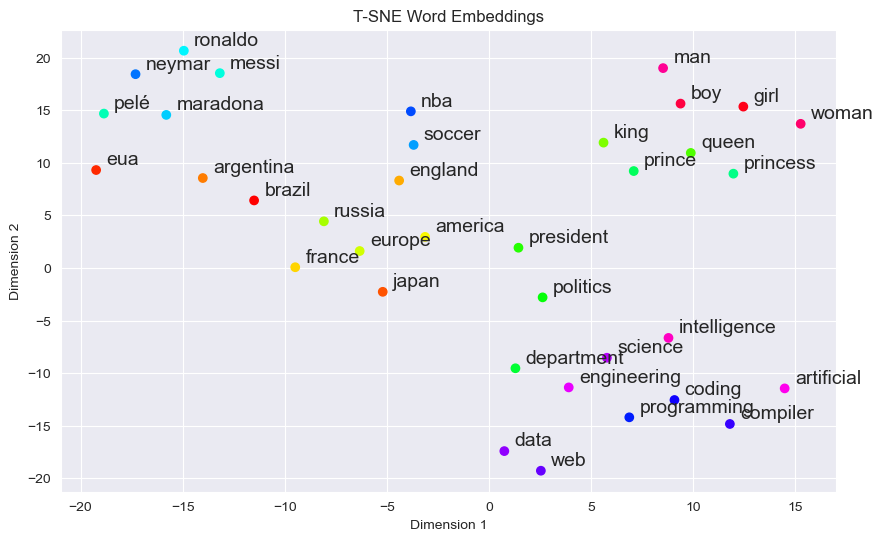

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

sns.set_style('darkgrid')


def plot_tsne(words, embds):
    tsne = TSNE(n_components=2, perplexity=10)
    vec2d = tsne.fit_transform(embds)

    plt.scatter(vec2d[:, 0], vec2d[:, 1], c=range(len(words)), cmap='hsv')

    for w, (x, y) in zip(words, vec2d):
        plt.text(x + 0.5, y + 0.5, w, fontsize=14)

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title(f"T-SNE Word Embeddings")


words = [
    'brazil', 'eua', 'japan', 'argentina', 'england', 'france', 'america', 'europe', 'russia',
    'king', 'queen', 'president', 'politics', 'department', 'prince', 'princess',
    'pelé', 'messi', 'ronaldo', 'maradona', 'soccer', 'neymar', 'nba',
    'programming', 'coding', 'compiler', 'web',
    'data', 'science', 'engineering', 'artificial', 'intelligence',
    'man', 'woman', 'boy', 'girl'
]

embds = np.array([glove_vectors[w] for w in words if w in glove_vectors])

plt.close('all')
plt.figure(figsize=(10, 6))
plot_tsne(words, embds)
plt.show()


## Referências



[ALM19] Almeida, F., & Xexéo, G. (2019). Word embeddings: A survey. arXiv preprint arXiv:1901.09069.

[WAN20] Wang, S., Zhou, W., & Jiang, C. (2020). A survey of word embeddings based on deep learning. Computing, 102(3), 717-740.

[MAA08] Maaten, L. V. D., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of machine learning research, 9(Nov), 2579-2605.

[FON21] Fonseca, Camilla. “Word Embedding: Fazendo o Computador Entender o Significado Das Palavras.” Turing Talks, 23 Jan. 2021, https://medium.com/turing-talks/word-embedding-fazendo-o-computador-entender-o-significado-das-palavras-92fe22745057.

[DOS19] Doshi, Sanket. “Skip-Gram: NLP Context Words Prediction Algorithm.” Medium, 17 Mar. 2019, https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c

[W&B24] “Weights & Biases.” W&B, https://wandb.ai/authors/embeddings-2/reports/An-Introduction-to-the-Global-Vectors-GloVe-Algorithm--VmlldzozNDg2NTQ. Accessed 14 Aug. 2024
